In [2]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')


In [8]:
!pip install praw

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import praw

reddit = praw.Reddit(client_id='zO7AY7kknVQklg',
                     client_secret='dEs8yZAjzHSO3eKGnKA8G1SywFI',
                     user_agent='SentimentAnalysis')


In [4]:
headlines = set()

In [5]:
#https://www.reddit.com/r/politics/
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))


957


In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)


[{'compound': 0.0,
  'headline': 'Matt Jones will not run for U.S. Senate seat',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.2411,
  'headline': 'Email shows Trump’s property not among original G-7 sites.',
  'neg': 0.197,
  'neu': 0.803,
  'pos': 0.0},
 {'compound': 0.0772,
  'headline': '9 times Trump and the people around him have put national security at risk',
  'neg': 0.135,
  'neu': 0.71,
  'pos': 0.155}]


In [9]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Matt Jones will not run for U.S. Senate seat
1,0.197,0.803,0.000,-0.2411,Email shows Trump’s property not among origina...
2,0.135,0.710,0.155,0.0772,9 times Trump and the people around him have p...
3,0.215,0.685,0.100,-0.3612,Dozens of Congress members join calls for Step...
4,0.000,0.784,0.216,0.2960,Kentucky’s Incoming Governor Has a Mandate to ...


In [10]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Matt Jones will not run for U.S. Senate seat,0
1,0.197,0.803,0.000,-0.2411,Email shows Trump’s property not among origina...,-1
2,0.135,0.710,0.155,0.0772,9 times Trump and the people around him have p...,0
3,0.215,0.685,0.100,-0.3612,Dozens of Congress members join calls for Step...,-1
4,0.000,0.784,0.216,0.2960,Kentucky’s Incoming Governor Has a Mandate to ...,1


In [11]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)


In [12]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)


Positive headlines:

['Kentucky’s Incoming Governor Has a Mandate to Restore Voting Rights',
 "It's Not the President's Foreign Policy. It's the Foreign Policy of the United States.",
 'Reuters/Ipsos poll: 3% support Bloomberg for Democratic nomination',
 'U.S. Intelligence Agencies: We Stopped Collecting Your Phone’s Location Data Without Probable Cause',
 'Bill Taylor, George Kent, and the Power of Expertise | With their deep knowledge and clear confidence in their own neutrality, the first impeachment hearing witnesses painted a clear picture of '
 'what’s at stake.']

Negative headlines:

['Email shows Trump’s property not among original G-7 sites.',
 "Dozens of Congress members join calls for Stephen Miller to resign over leaked emails showing ' white nationalist beliefs'",
 'Trump attacks impeachment witness on Twitter, Democrats see intimidation',
 'Trump wants South Korea to pay more for defense. He shouldn’t stop there',
 "'Pound The Table': Trump Allies Struggle To Defend Bri

In [13]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)


 0    455
-1    324
 1    178
Name: label, dtype: int64
 0    47.544410
-1    33.855799
 1    18.599791
Name: label, dtype: float64


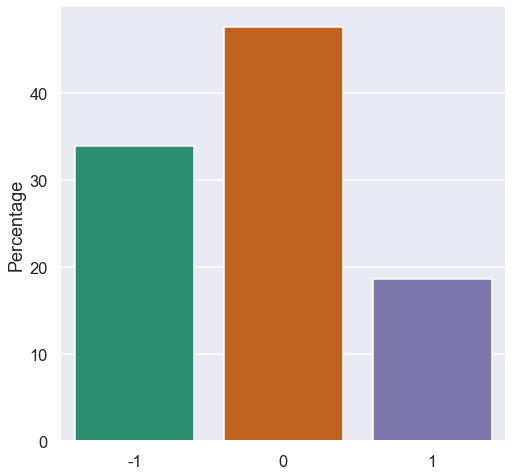

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

#ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()